Dependent variable: Temperature


Data Summary and Pearson Correlation matrix

This code block is for **Initial Data Loading and Overview**.

*   `import pandas as pd`: Imports the pandas library, essential for data manipulation.
*   `df = pd.read_csv("/content/qbmult_dataset.csv")`: Loads your dataset into a pandas DataFrame named `df`.
*   `print(df.shape)`: Displays the number of rows and columns in the dataset.
*   `print(df.head())`: Shows the first 5 rows of the DataFrame, giving a quick glance at the data structure and content.
*   `print(df[["ARMS","AGE","BMI","SEX","IPAQ"]].describe())`: Generates descriptive statistics (count, mean, std, min, max, quartiles) for the selected columns. This helps understand the distribution and central tendencies of your variables.
*   `print(df[["ARMS","AGE","BMI","SEX","IPAQ"]].corr())`: Computes the Pearson correlation matrix for the specified variables. This matrix shows the linear relationship between each pair of variables. In regression, it helps identify potential predictors that have a linear association with the dependent variable ('ARMS' in this case).

**Role in Regression:** These steps are crucial for understanding your data before building any model. They help you get acquainted with the variables, identify potential issues (like missing values, outliers, or unusual distributions), and see initial linear relationships between variables.

In [2]:
# -*- coding: utf-8 -*-
"""REGRESSION ANALYSIS.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1kYFubvma0aqcU_EQ0PToSm9Si4VIRoap
"""

import pandas as pd
from scipy.stats import shapiro

# Load your data
tampa_df = pd.read_csv("/content/merged_climate_data_tampa.csv")

print(tampa_df.shape)
print(tampa_df.head())

# summary and correlations
print(tampa_df[["Temperature",	"Aerosol Optical Depth",	"Clearsky DHI",	"Clearsky DNI",	"Clearsky GHI",	"Dew Point",	"DHI",	"DNI",	"GHI",	"Ozone",	"Relative Humidity",	"Solar Zenith Angle",	"SSA",	"Surface Albedo",	"Pressure", "Precipitable Water",	"Wind Direction",	"Wind Speed",	"Global Horizontal UV Irradiance (280-400nm)",	"Global Horizontal UV Irradiance (295-385nm)"]].describe())

print(tampa_df[["Temperature",	"Aerosol Optical Depth",	"Clearsky DHI",	"Clearsky DNI",	"Clearsky GHI",	"Dew Point",	"DHI",	"DNI",	"GHI",	"Ozone",	"Relative Humidity",	"Solar Zenith Angle",	"SSA",	"Surface Albedo",	"Pressure", "Precipitable Water",	"Wind Direction",	"Wind Speed",	"Global Horizontal UV Irradiance (280-400nm)",	"Global Horizontal UV Irradiance (295-385nm)"]].corr())

(27, 22)
   Temperature  Aerosol Optical Depth  Asymmetry  Clearsky DHI  Clearsky DNI  \
0    22.707671               0.148567   0.632521        459926       2929091   
1    22.561039               0.122513   0.632521        425803       3033141   
2    22.471221               0.144636   0.632521        455258       2969074   
3    22.287523               0.138565   0.632521        453238       2954248   
4    22.466541               0.140345   0.632521        452858       2943284   

   Clearsky GHI  Dew Point     DHI      DNI      GHI  ...  Solar Zenith Angle  \
0       2306392  19.366461  652418  2039661  1943023  ...           89.723369   
1       2325602  18.083927  615424  2182544  1978181  ...           89.723336   
2       2318582  17.207043  619970  2250417  2027539  ...           89.748961   
3       2310148  18.141461  653075  2043020  1948330  ...           89.723718   
4       2303808  18.652032  664346  1995170  1924648  ...           89.723731   

        SSA  Surface Al

Check Linearity between dependent and predictor variables: Spearman Correlation Matrix

This code block calculates the **Spearman Rank-Order Correlation**.

*   `from scipy.stats import spearmanr`: Imports the `spearmanr` function for calculating Spearman correlation.
*   `vars = [...]`: Defines a list of variables to be analyzed.
*   `data = df[vars].dropna()`: Selects the specified columns and drops any rows with missing values to ensure accurate correlation calculation.
*   `corr, pval = spearmanr(data)`: Computes the Spearman correlation coefficients and p-values. Spearman correlation assesses the monotonic relationship between ranked data, which is less sensitive to outliers and non-normal distributions than Pearson correlation.
*   `corr_matrix = pd.DataFrame(corr, index=vars, columns=vars)`: Organizes the correlation results into a DataFrame for better readability.
*   `print(corr_matrix.round(3))`: Prints the Spearman correlation matrix, rounded to three decimal places.

**Role in Regression:** While linear regression assumes a linear relationship, examining Spearman correlation provides a broader view of monotonic relationships. Strong monotonic relationships suggest that a transformation of variables might lead to better linear fit, or simply confirms that variables move together. It complements Pearson correlation in understanding variable associations.

In [10]:

import pandas as pd
import numpy as np
from scipy.stats import spearmanr

vars = ["Temperature",	"Aerosol Optical Depth",	"Clearsky DHI",	"Clearsky DNI",	"Clearsky GHI",	"Dew Point",	"DHI",	"DNI",	"GHI",	"Ozone",	"Relative Humidity",	"Solar Zenith Angle",	"SSA",	"Surface Albedo",	"Pressure", "Precipitable Water",	"Wind Direction",	"Wind Speed",	"Global Horizontal UV Irradiance (280-400nm)",	"Global Horizontal UV Irradiance (295-385nm)"]
data = tampa_df[vars].dropna()

# Compute Spearman correlations and p-values
corr, pval = spearmanr(data)

# Convert to DataFrames
corr_matrix = pd.DataFrame(corr, index=vars, columns=vars)

print("Spearman Correlation Matrix:")
print(corr_matrix.round(3))


Spearman Correlation Matrix:
                                             Temperature  \
Temperature                                        1.000   
Aerosol Optical Depth                             -0.387   
Clearsky DHI                                      -0.336   
Clearsky DNI                                       0.212   
Clearsky GHI                                       0.092   
Dew Point                                          0.662   
DHI                                               -0.350   
DNI                                                0.056   
GHI                                               -0.130   
Ozone                                             -0.114   
Relative Humidity                                 -0.146   
Solar Zenith Angle                                 0.344   
SSA                                               -0.380   
Surface Albedo                                     0.413   
Pressure                                           0.075   
Precipitabl

This code block generates **Scatter Plots for Visualizing Relationships**.

*   `import matplotlib.pyplot as plt`: Imports Matplotlib, a plotting library.
*   The code then generates two scatter plots:
    *   `ARMS` vs `AGE`
    *   `ARMS` vs `BMI`
*   Each plot shows the relationship between the dependent variable (`ARMS`) and one predictor (`AGE` or `BMI`), helping to visually assess linearity, direction, strength, and identify potential outliers or patterns.

**Role in Regression:** Scatter plots are fundamental for visually inspecting the relationship between the dependent variable and each independent variable. They help confirm linearity assumptions, identify non-linear patterns, or detect influential outliers that might impact the regression model. This visual check is crucial for guiding variable transformations or model selection.

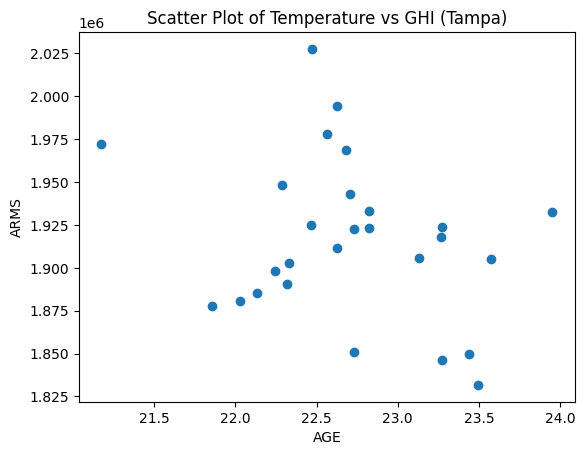

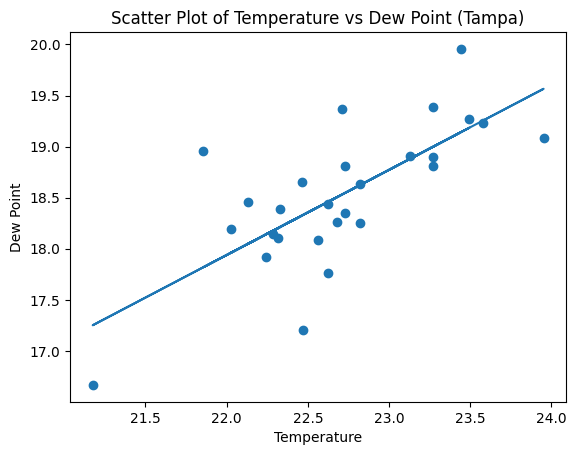

In [3]:

import matplotlib.pyplot as plt
import numpy as np

# ARMS vs AGE
plt.figure()
plt.scatter(tampa_df["Temperature"], tampa_df["GHI"])
plt.xlabel("AGE")
plt.ylabel("ARMS")
plt.title("Scatter Plot of Temperature vs GHI (Tampa)")
plt.show()

# ARMS vs BMI
plt.figure()
x = np.array(tampa_df["Temperature"])
y = np.array(tampa_df["Dew Point"])
plt.scatter(x, y)
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.xlabel("Temperature")
plt.ylabel("Dew Point")
plt.title("Scatter Plot of Temperature vs Dew Point (Tampa)")
plt.show()


Check for Multicollinearity: VIF (Variance Inflation Factor)

This code block calculates the **Variance Inflation Factor (VIF)**.

*   `import statsmodels.api as sm` and `from statsmodels.stats.outliers_influence import variance_inflation_factor`: Imports necessary libraries for statistical modeling and VIF calculation.
*   `X = df[["AGE", "BMI", "SEX", "IPAQ"]].dropna()`: Selects the independent variables and removes any rows with missing values.
*   `X = sm.add_constant(X)`: Adds a constant (intercept) term to the predictor matrix, which is required for `statsmodels` to correctly calculate VIF (and later for the regression model).
*   The loop then calculates the VIF for each predictor variable. VIF measures how much the variance of an estimated regression coefficient is inflated due to multicollinearity.
*   `print(vif_data)`: Displays a DataFrame showing each variable and its corresponding VIF.

**Role in Regression:** Multicollinearity (high correlation between independent variables) can make regression coefficients unstable and difficult to interpret. High VIF values (e.g., typically above 5 or 10) indicate significant multicollinearity, suggesting that these variables provide redundant information. Addressing multicollinearity (e.g., by removing one of the correlated variables or combining them) can improve model stability and interpretability.

In [22]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select predictor variables
X = tampa_df[["Aerosol Optical Depth", "Dew Point",	"DHI",	"GHI",	"Ozone",	"Solar Zenith Angle",	"SSA",	"Surface Albedo",	"Pressure",	"Wind Direction",	"Wind Speed"]].dropna()

# Add constant (intercept)
X = sm.add_constant(X)

# Compute VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 Variable           VIF
0                   const  9.628436e+07
1   Aerosol Optical Depth  1.896278e+00
2               Dew Point  2.577237e+00
3                     DHI  4.380275e+00
4                     GHI  3.487577e+00
5                   Ozone  1.190703e+00
6      Solar Zenith Angle  1.672488e+00
7                     SSA  3.015687e+00
8          Surface Albedo  4.193003e+00
9                Pressure  1.990697e+00
10         Wind Direction  1.528624e+00
11             Wind Speed  3.162525e+00


OLS Regression Results

This code block fits an **Ordinary Least Squares (OLS) Regression Model**.

*   `import statsmodels.formula.api as smf`: Imports the formula API from `statsmodels`, which allows you to define models using R-style formulas.
*   `model = smf.ols("ARMS ~ AGE+ BMI+ SEX + IPAQ", data=df).fit()`: This is the core line for building the linear regression model. It specifies that `ARMS` is the dependent variable, and `AGE`, `BMI`, `SEX`, and `IPAQ` are the independent variables. The `.fit()` method estimates the model parameters.
*   `print(model.summary())`: Prints a comprehensive summary of the regression model. This summary includes:
    *   **R-squared and Adj. R-squared**: Measures the proportion of variance in the dependent variable explained by the independent variables.
    *   **F-statistic and Prob (F-statistic)**: Tests the overall significance of the regression model.
    *   **Coefficients (coef)**: The estimated effect of each independent variable on the dependent variable.
    *   **Standard Errors (std err)**: Measures the precision of the coefficient estimates.
    *   **t-values and P-values (P>|t|)**: Tests the statistical significance of each individual coefficient.
    *   **Confidence Intervals ([0.025 0.975])**: Provides a range within which the true coefficient likely lies.
    *   **Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis**: Diagnostics for model assumptions, particularly about residuals.

**Role in Regression:** This is the primary step of building the regression model. The output provides all the critical information to interpret the model, assess the significance of predictors, and evaluate its overall fit and explanatory power.

In [25]:

import statsmodels.formula.api as smf
model = smf.ols("Temperature ~ Q('Aerosol Optical Depth') + Q('Dew Point') + DHI + GHI + Ozone + Q('Solar Zenith Angle') + SSA + Q('Surface Albedo') + Pressure + Q('Wind Direction') + Q('Wind Speed')", data=tampa_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     11.13
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           2.52e-05
Time:                        00:32:04   Log-Likelihood:                 5.9582
No. Observations:                  27   AIC:                             12.08
Df Residuals:                      15   BIC:                             27.63
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

This code block performs an **ANOVA (Analysis of Variance) for the OLS Model**.

*   `from statsmodels.stats.anova import anova_lm`: Imports the function to perform ANOVA on a linear model.
*   `anova_results = anova_lm(model, typ=2)`: Calculates the ANOVA table using Type II sum of squares, which is appropriate for balanced and unbalanced designs.
*   `print(anova_results)`: Displays the ANOVA table, showing the sum of squares, degrees of freedom, F-statistics, and p-values for each predictor. This helps in understanding the unique contribution of each variable to the model's explanatory power.
*   The subsequent lines calculate `SS_regression`, `SS_residual`, and `SS_total`. These are the sum of squares due to regression, residuals, and total variation, respectively. They are fundamental components for understanding the partitioning of variance in the dependent variable.

**Role in Regression:** ANOVA provides an alternative way to assess the statistical significance of the independent variables and the overall model. It breaks down the total variability in the dependent variable into parts explained by the model (regression) and parts unexplained (residual). This helps confirm the findings from the `model.summary()` regarding predictor importance and model fit.

In [26]:

from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(model, typ=2)
print(anova_results)

SS_regression = anova_results["sum_sq"][:-1].sum()   # sum of all predictors
SS_residual   = anova_results.loc["Residual", "sum_sq"]
SS_total      = SS_regression + SS_residual

print("SS_regression:", SS_regression)
print("SS_residual:", SS_residual)
print("SS_total:", SS_total)


                              sum_sq    df          F    PR(>F)
Q('Aerosol Optical Depth')  0.000023   1.0   0.000341  0.985520
Q('Dew Point')              4.060257   1.0  59.900700  0.000001
DHI                         0.014005   1.0   0.206614  0.655943
GHI                         0.697272   1.0  10.286814  0.005875
Ozone                       0.069190   1.0   1.020759  0.328360
Q('Solar Zenith Angle')     0.008256   1.0   0.121795  0.731947
SSA                         0.810751   1.0  11.960954  0.003510
Q('Surface Albedo')         0.000067   1.0   0.000991  0.975307
Pressure                    0.337923   1.0   4.985351  0.041227
Q('Wind Direction')         0.006011   1.0   0.088678  0.769949
Q('Wind Speed')             0.375281   1.0   5.536501  0.032688
Residual                    1.016747  15.0        NaN       NaN
SS_regression: 6.379036185727166
SS_residual: 1.0167469481456437
SS_total: 7.3957831338728095


This code block generates **Diagnostic Plots for OLS Residuals**.

*   `fitted = model.fittedvalues`: Extracts the predicted values (fitted values) from the OLS model.
*   `resid = model.resid`: Extracts the residuals (observed - predicted values) from the OLS model.
*   **Residuals vs Fitted Plot**: `plt.scatter(fitted, resid)` creates a scatter plot of residuals against fitted values. This plot helps check the assumption of homoscedasticity (constant variance of residuals) and linearity. Ideally, residuals should be randomly scattered around zero, with no discernible pattern.
*   **Normal Q-Q Plot**: `sm.qqplot(resid, line='45')` generates a Quantile-Quantile plot. This plot compares the distribution of the residuals to a normal distribution. If the residuals are normally distributed, the points should fall approximately along the 45-degree line.

**Role in Regression:** These plots are crucial for assessing the fundamental assumptions of linear regression: homoscedasticity, linearity, and normality of residuals. Violations of these assumptions can lead to biased standard errors, incorrect p-values, and ultimately, unreliable model inferences. Identifying issues here guides further model refinement or alternative modeling approaches.

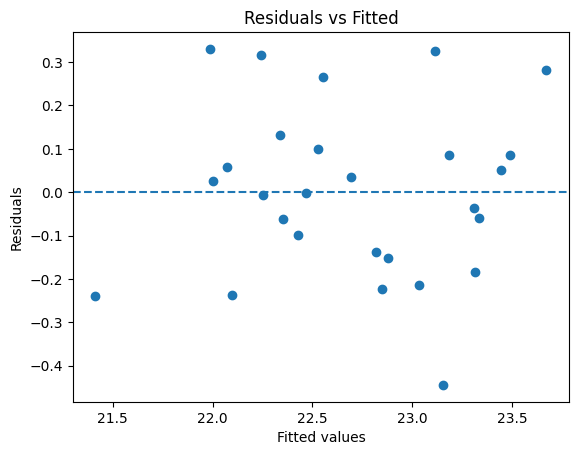

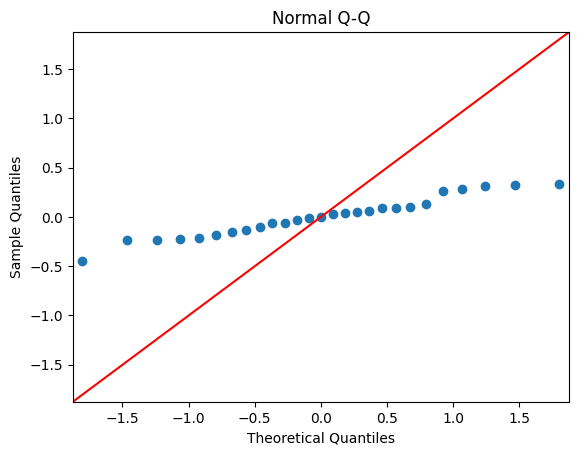

In [27]:

import matplotlib.pyplot as plt
import statsmodels.api as sm

# residuals vs fitted
fitted = model.fittedvalues
resid = model.resid
plt.scatter(fitted, resid)
plt.axhline(0, linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# QQ plot
sm.qqplot(resid, line='45')
plt.title('Normal Q-Q')
plt.show()


This code block refines the **Diagnostic Plots using Standardized Residuals**.

*   `standardized_residuals = model.get_influence().resid_studentized_internal`: Calculates standardized (studentized internal) residuals. Standardizing residuals helps to make them comparable across different observations and makes it easier to spot outliers.
*   **Standardized Residuals vs Fitted Plot**: Similar to the previous residuals vs fitted plot, but using standardized residuals. This plot is often preferred for checking homoscedasticity as it normalizes the y-axis, making it easier to identify patterns or fanning out of residuals.
*   **QQ Plot of Standardized Residuals**: Another QQ plot, this time using standardized residuals. This provides a clearer assessment of the normality assumption, as standardized residuals should follow a standard normal distribution (mean 0, standard deviation 1).

**Role in Regression:** These standardized residual plots offer a more robust way to check for heteroscedasticity and non-normality. Standardized residuals are particularly useful for identifying potential outliers or influential data points, as residuals exceeding certain thresholds (e.g., +/- 2 or 3) are considered unusual.

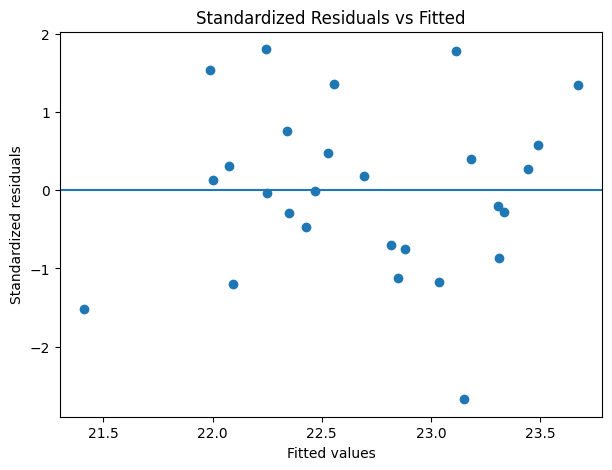

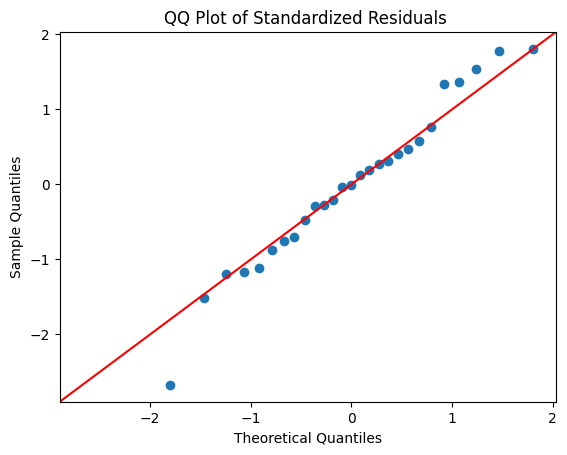

In [28]:

import numpy as np

standardized_residuals = model.get_influence().resid_studentized_internal

plt.figure(figsize=(7, 5))
plt.scatter(model.fittedvalues, standardized_residuals)
plt.axhline(0)
plt.xlabel("Fitted values")
plt.ylabel("Standardized residuals")
plt.title("Standardized Residuals vs Fitted")
plt.show()

# 2. Fit the original model
model = smf.ols("Temperature ~ Q('Aerosol Optical Depth') + Q('Dew Point') + DHI + GHI + Ozone + Q('Solar Zenith Angle') + SSA + Q('Surface Albedo') + Pressure + Q('Wind Direction') + Q('Wind Speed')", data=tampa_df).fit()

# 3. Get standardized (studentized internal) residuals
influence = model.get_influence()
std_resid = influence.resid_studentized_internal

# 4. QQ plot using standardized residuals
fig = sm.qqplot(std_resid, line="45")
plt.title("QQ Plot of Standardized Residuals ")
plt.show()


This code block performs the **Breusch-Pagan Test for Heteroscedasticity**.

*   `from statsmodels.stats.diagnostic import het_breuschpagan`: Imports the `het_breuschpagan` function for the test.
*   `bp_test = het_breuschpagan(model.resid, model.model.exog)`: Executes the Breusch-Pagan test. It takes the residuals and the design matrix (exogenous variables) of the model as input. This test formally checks if the variance of the residuals is constant across all levels of the independent variables.
*   `bp_labels = [...]` and `print(dict(zip(bp_labels, bp_test)))`: Formats and prints the results of the test, including the LM Statistic, its p-value, the F Statistic, and its p-value.

**Role in Regression:** The Breusch-Pagan test provides a statistical (rather than just visual) confirmation for the assumption of homoscedasticity. A low p-value (typically < 0.05) indicates that heteroscedasticity is present, meaning the variance of residuals is not constant. If heteroscedasticity is detected, it suggests that the standard OLS estimates might be inefficient, and Weighted Least Squares (WLS) or robust standard errors might be more appropriate.

In [30]:

from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)

bp_labels = ["LM Statistic", "LM p-value", "F Statistic", "F p-value"]
print(dict(zip(bp_labels, bp_test)))


{'LM Statistic': np.float64(16.403057081551133), 'LM p-value': np.float64(0.12681479351980338), 'F Statistic': np.float64(2.1107790504622432), 'F p-value': np.float64(0.08941321773111285)}


This code block **Identifies an Outlier based on Residuals**.

*   `outlier_index = np.argmin(model.resid)`: Finds the index of the observation with the smallest residual. This identifies the observation where the model's prediction was furthest below the actual value.
*   `df.iloc[outlier_index]`: Displays the entire row of data for that identified outlier.

**Role in Regression:** Identifying outliers is an important part of regression diagnostics. Outliers can heavily influence the estimated regression coefficients and the overall fit of the model. Understanding the characteristics of these outliers can inform decisions about whether to remove them, transform the data, or use more robust regression techniques.

In [31]:

import numpy as np

outlier_index = np.argmin(model.resid)
tampa_df.iloc[outlier_index]


,0
Temperature,2.270767e+01
Aerosol Optical Depth,1.485666e-01
Asymmetry,6.325205e-01
Clearsky DHI,4.599260e+05
Clearsky DNI,2.929091e+06
Clearsky GHI,2.306392e+06
Dew Point,1.936646e+01
DHI,6.524180e+05
DNI,2.039661e+06
GHI,1.943023e+06


This code block performs **Weighted Least Squares (WLS) Regression**.

*   **Step 1: Fit OLS first**: An initial OLS model is fitted to get the residuals.
*   **Step 2: Model the variance**: The squared residuals (`resid_sq = ols_model.resid**2`) are used as a proxy for the variance. Another OLS model is then fitted to predict `resid_sq` using the `fittedvalues` from the first OLS model. This helps model how the variance changes with the predicted values.
*   **Step 3: Define weights**: The weights for WLS are calculated as the inverse of the predicted variance (`weights = 1 / variance_model.fittedvalues`). Observations with higher predicted variance (i.e., where heteroscedasticity is more pronounced) will receive lower weights, and vice-versa.
*   **Fit WLS model**: Finally, `sm.WLS(y, X, weights=weights).fit()` fits the Weighted Least Squares model using the calculated weights. This model attempts to correct for heteroscedasticity by giving less influence to observations with larger residual variance.
*   `print(wls_model.summary())`: Prints the summary of the WLS model, which has a similar structure to the OLS summary, but with potentially more efficient and reliable coefficient estimates and standard errors in the presence of heteroscedasticity.

**Role in Regression:** WLS regression is a technique used when the assumption of homoscedasticity (constant variance of residuals) is violated. By weighting observations inversely to their residual variance, WLS provides more efficient (lower variance) coefficient estimates than OLS when heteroscedasticity is present. This leads to more reliable hypothesis tests and confidence intervals for the regression coefficients.

This text cell introduces the Weighted Least Squares (WLS) Regression, often used when heteroscedasticity is detected.

WLS Regression Results

In [32]:

import numpy as np
import statsmodels.api as sm

# Step 1: Fit OLS first
X = tampa_df[["Aerosol Optical Depth", "Dew Point",	"DHI",	"GHI",	"Ozone",	"Solar Zenith Angle",	"SSA",	"Surface Albedo",	"Pressure",	"Wind Direction",	"Wind Speed"]]
X = sm.add_constant(X)
y = tampa_df["Temperature"]

ols_model = sm.OLS(y, X).fit()

# Step 2: Model the variance
resid_sq = ols_model.resid**2
variance_model = sm.OLS(resid_sq, sm.add_constant(ols_model.fittedvalues)).fit()

# Step 3: Define weights
weights = 1 / variance_model.fittedvalues

# Fit WLS model
wls_model = sm.WLS(y, X, weights=weights).fit()

print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.891
Model:                            WLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     11.20
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           2.43e-05
Time:                        00:46:13   Log-Likelihood:                 5.9636
No. Observations:                  27   AIC:                             12.07
Df Residuals:                      15   BIC:                             27.62
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -79.12

**Little notes**
Autocorrelation refers to the degree of similarity or correlation between values of the same variable at different points in time, particularly in time series data.



The Durbin-Watson test statistic implies the presence and type of first-order autocorrelation in regression residuals:

Value close to 2: Indicates no significant autocorrelation, implying that the model’s residuals are independent, which satisfies a key assumption of ordinary least squares (OLS) regression.
Substantially less than 2 (e.g., below 1.5): Suggests positive autocorrelation, meaning consecutive residuals are positively correlated. This often occurs in time series data where errors persist over time, potentially due to omitted lagged variables or model misspecification. It can lead to underestimated standard errors and inflated significance of predictors.
Substantially greater than 2 (e.g., above 2.5): Indicates negative autocorrelation, where residuals alternate in sign more than expected, possibly due to over-adjustment in the model or unmodeled cyclical patterns.